In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

In [3]:
project_name = 'Rossman_stores'

In [4]:
PATH='data/rossmann/'

# Datasets

All the different CSV files

In [5]:
table_names = ['train', 'store', 'store_states', 'state_names', 
               'googletrend', 'weather', 'test']

In [6]:
tables = [pd.read_csv(f'{PATH}{fname}.csv', low_memory=False) for fname in table_names]

In [7]:
from IPython.display import HTML

We can use head() to get a quick look at the contents of each table:
* train: Contains store information on a daily basis, tracks things like sales, customers, whether that day was a holdiay, etc.
* store: general info about the store including competition, etc.
* store_states: maps store to state it is in
* state_names: Maps state abbreviations to names
* googletrend: trend data for particular week/state
* weather: weather conditions for each state
* test: Same as training table, w/o sales and customers

In [8]:
for t in tables:
    display(t.head())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


,Store,State
0,1,HE
1,2,TH
2,3,NW
3,4,BE
4,5,SN


,StateName,State
0,BadenWuerttemberg,BW
1,Bayern,BY
2,Berlin,BE
3,Brandenburg,BB
4,Bremen,HB


,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67


,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,NordrheinWestfalen,2013-01-01,8,4,2,7,5,1,94,87,...,31.0,12.0,4.0,39,26,58.0,5.08,6.0,Rain,215
1,NordrheinWestfalen,2013-01-02,7,4,1,5,3,2,93,85,...,31.0,14.0,10.0,24,16,NaN,0.00,6.0,Rain,225
2,NordrheinWestfalen,2013-01-03,11,8,6,10,8,4,100,93,...,31.0,8.0,2.0,26,21,NaN,1.02,7.0,Rain,240
3,NordrheinWestfalen,2013-01-04,9,9,8,9,9,8,100,94,...,11.0,5.0,2.0,23,14,NaN,0.25,7.0,Rain,263
4,NordrheinWestfalen,2013-01-05,8,8,7,8,7,6,100,94,...,10.0,6.0,3.0,16,10,NaN,0.00,7.0,Rain,268


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [9]:
for t in tables:
    display(DataFrameSummary(t).summary())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.01721e+06,1.01721e+06,NaN,1.01721e+06,1.01721e+06,1.01721e+06,1.01721e+06,NaN,1.01721e+06
mean,558.43,3.99834,NaN,5773.82,633.146,0.830107,0.381515,NaN,0.178647
std,321.909,1.99739,NaN,3849.93,464.412,0.375539,0.485759,NaN,0.383056
min,1,1,NaN,0,0,0,0,NaN,0
25%,280,2,NaN,3727,405,1,0,NaN,0
50%,558,4,NaN,5744,609,1,0,NaN,0
75%,838,6,NaN,7856,837,1,1,NaN,0
max,1115,7,NaN,41551,7388,1,1,NaN,1
counts,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209
uniques,1115,7,942,21734,4086,2,2,4,2


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115,NaN,NaN,1112,761,761,1115,571,571,NaN
mean,558,NaN,NaN,5404.9,7.2247,2008.67,0.512108,23.5954,2011.76,NaN
std,322.017,NaN,NaN,7663.17,3.21235,6.19598,0.500078,14.142,1.67494,NaN
min,1,NaN,NaN,20,1,1900,0,1,2009,NaN
25%,279.5,NaN,NaN,717.5,4,2006,0,13,2011,NaN
50%,558,NaN,NaN,2325,8,2010,1,22,2012,NaN
75%,836.5,NaN,NaN,6882.5,10,2013,1,37,2013,NaN
max,1115,NaN,NaN,75860,12,2015,1,50,2015,NaN
counts,1115,1115,1115,1112,761,761,1115,571,571,571
uniques,1115,4,3,654,12,23,2,24,7,3


,Store,State
count,1115,NaN
mean,558,NaN
std,322.017,NaN
min,1,NaN
25%,279.5,NaN
50%,558,NaN
75%,836.5,NaN
max,1115,NaN
counts,1115,1115
uniques,1115,12


,StateName,State
count,16,16
unique,16,16
top,Niedersachsen,RP
freq,1,1
counts,16,16
uniques,16,16
missing,0,0
missing_perc,0%,0%
types,unique,unique


,file,week,trend
count,NaN,NaN,2072
mean,NaN,NaN,63.8142
std,NaN,NaN,12.6502
min,NaN,NaN,0
25%,NaN,NaN,55
50%,NaN,NaN,64
75%,NaN,NaN,72
max,NaN,NaN,100
counts,2072,2072,2072
uniques,14,148,68


,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
count,NaN,NaN,15840,15840,15840,15840,15840,15840,15840,15840,...,15459,15459,15459,15840,15840,3604,15840,14667,NaN,15840
mean,NaN,NaN,14.6441,10.389,6.19899,8.58782,6.20581,3.62614,93.6596,74.2829,...,24.0576,12.2398,7.02516,22.7666,11.9722,48.8643,0.831718,5.55131,NaN,175.897
std,NaN,NaN,8.64601,7.37926,6.52639,6.24478,6.08677,6.12839,7.67853,13.4866,...,8.9768,5.06794,4.9806,8.98862,5.87284,13.027,2.51351,1.68771,NaN,101.589
min,NaN,NaN,-11,-13,-15,-14,-15,-73,44,30,...,0,0,0,3,2,21,0,0,NaN,-1
25%,NaN,NaN,8,4,1,4,2,-1,90.75,65,...,14,10,3,16,8,39,0,5,NaN,80
50%,NaN,NaN,15,11,7,9,7,4,94,76,...,31,11,7,21,11,48,0,6,NaN,202
75%,NaN,NaN,21,16,11,13,11,8,100,85,...,31,14,10,27,14,55,0.25,7,NaN,256
max,NaN,NaN,39,31,24,25,20,19,100,100,...,31,31,31,101,53,111,58.93,8,NaN,360
counts,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,...,15459,15459,15459,15840,15840,3604,15840,14667,11889,15840
uniques,16,990,51,45,40,40,36,40,53,71,...,24,32,24,44,29,47,41,9,21,362


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
count,41088,41088,41088,NaN,41077,41088,NaN,41088
mean,20544.5,555.9,3.97917,NaN,0.854322,0.395833,NaN,0.443487
std,11861.2,320.274,2.01548,NaN,0.352787,0.489035,NaN,0.496802
min,1,1,1,NaN,0,0,NaN,0
25%,10272.8,279.75,2,NaN,1,0,NaN,0
50%,20544.5,553.5,4,NaN,1,0,NaN,0
75%,30816.2,832.25,6,NaN,1,1,NaN,1
max,41088,1115,7,NaN,1,1,NaN,1
counts,41088,41088,41088,41088,41077,41088,41088,41088
uniques,41088,856,7,48,2,2,2,2


# Feature engineering

As a structured data problem, we necessarily have to go through all the cleaning and feature engineering, even though we're using a neural network.

In [10]:
train, store, store_states, state_names, googletrend, weather, test = tables

In [11]:
len(train)

1017209

In [12]:
len(test)

41088

#### Turn holidays into boolean

In [13]:
train.StateHoliday = train.StateHoliday != '0'
test.StateHoliday = test.StateHoliday != '0'

`join_df` is a function for joining tables on specific fields. By default, we'll be doing a left outer join of `right` on the `left` argument using the given fields for each table.

Pandas does joins using the `merge` method. The `suffixes` argument describes the naming convention for duplicate fields. We've elected to leave the duplicate field names on the left untouched, and append a "\_y" to those on the right.

In [14]:
def join_df(left, right, left_on, right_on = None, suffix = '_y'):
    if right_on is None: 
        right_on = left_on
    return left.merge(right, how='left', left_on = left_on, right_on = right_on, suffixes = ("", suffix))
    

#### Merge weather and state

In [15]:
weather = join_df(weather, state_names, 'file', 'StateName') # weather col = file and state_name col = StateName

In [16]:
weather.head()

,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,StateName,State
0,NordrheinWestfalen,2013-01-01,8,4,2,7,5,1,94,87,...,4.0,39,26,58.0,5.08,6.0,Rain,215,NordrheinWestfalen,NW
1,NordrheinWestfalen,2013-01-02,7,4,1,5,3,2,93,85,...,10.0,24,16,NaN,0.00,6.0,Rain,225,NordrheinWestfalen,NW
2,NordrheinWestfalen,2013-01-03,11,8,6,10,8,4,100,93,...,2.0,26,21,NaN,1.02,7.0,Rain,240,NordrheinWestfalen,NW
3,NordrheinWestfalen,2013-01-04,9,9,8,9,9,8,100,94,...,2.0,23,14,NaN,0.25,7.0,Rain,263,NordrheinWestfalen,NW
4,NordrheinWestfalen,2013-01-05,8,8,7,8,7,6,100,94,...,3.0,16,10,NaN,0.00,7.0,Rain,268,NordrheinWestfalen,NW


#### Data extraction on googletrend

In [17]:
googletrend.head()

,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67


In [18]:
googletrend['Date'] = googletrend.week.str.split(' - ', expand=True)[0]

In [19]:
googletrend.head()

,file,week,trend,Date
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96,2012-12-02
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95,2012-12-09
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91,2012-12-16
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48,2012-12-23
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67,2012-12-30


In [20]:
googletrend['State'] = googletrend.file.str.split('_', expand=True)[2]

In [21]:
googletrend.head()

,file,week,trend,Date,State
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96,2012-12-02,SN
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95,2012-12-09,SN
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91,2012-12-16,SN
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48,2012-12-23,SN
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67,2012-12-30,SN


In [22]:
googletrend.loc[googletrend.State == 'Ni', 'State'] = 'HB, NI'

The following extracts particular date fields from a complete datetime for the purpose of constructing categoricals.

You should *always* consider this feature extraction step when working with date-time. Without expanding your date-time into these additional fields, you can't capture any trend/cyclical behavior as a function of time at any of these granularities. We'll add to every table with a date field.

In [23]:
add_datepart(weather, 'Date', drop=False)
add_datepart(googletrend, 'Date', drop=False)
add_datepart(train, 'Date', drop=False)
add_datepart(test, 'Date', drop=False)

In [24]:
googletrend.head()

,file,week,trend,Date,State,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96,2012-12-02,SN,2012,12,48,2,6,337,False,False,False,False,False,False,1354406400
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95,2012-12-09,SN,2012,12,49,9,6,344,False,False,False,False,False,False,1355011200
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91,2012-12-16,SN,2012,12,50,16,6,351,False,False,False,False,False,False,1355616000
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48,2012-12-23,SN,2012,12,51,23,6,358,False,False,False,False,False,False,1356220800
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67,2012-12-30,SN,2012,12,52,30,6,365,False,False,False,False,False,False,1356825600


The Google trends data has a special category for the whole of the Germany - we'll pull that out so we can use it explicitly.

In [25]:
trend_de = googletrend[googletrend.file == 'Rossmann_DE']

### Create a single dataframe from all the tables

Now we can **outer join all of our data into a single dataframe**. Recall that in outer joins everytime a value in the joining field on the left table does not have a corresponding value on the right table, the corresponding row in the new table has Null values for all right table fields. One way to **check that all records are consistent and complete is to check for Null values post-join, as we do here**.

*Aside*: **Why not just do an inner join?**
If you are assuming that all records are complete and match on the field you desire, an inner join will do the same thing as an outer join. However, in the event you are wrong or a mistake is made, an outer join followed by a null-check will catch it. (Comparing before/after # of rows for inner join is equivalent, but requires keeping track of before/after row #'s. Outer join is easier.)

In [26]:
store = join_df(store, store_states, 'Store')
len(store[store.State.isnull()])

0

In [27]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,State
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,HE
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",TH
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",NW
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,BE
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,SN


In [28]:
joined = join_df(train, store, 'Store')
joined_test = join_df(test, store, 'Store')

In [29]:
joined.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,State
0,1,5,2015-07-31,5263,555,1,1,False,1,2015,...,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,HE
1,2,5,2015-07-31,6064,625,1,1,False,1,2015,...,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",TH
2,3,5,2015-07-31,8314,821,1,1,False,1,2015,...,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",NW
3,4,5,2015-07-31,13995,1498,1,1,False,1,2015,...,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,BE
4,5,5,2015-07-31,4822,559,1,1,False,1,2015,...,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,SN


In [30]:
len(joined[joined.StoreType.isnull()])

0

In [31]:
len(joined_test[joined_test.StoreType.isnull()])

0

In [32]:
joined = join_df(joined, googletrend, ['State', 'Year', 'Week'])
joined_test = join_df(joined_test, googletrend, ['State', 'Year', 'Week'])

In [33]:
len(joined[joined.trend.isnull()]), len(joined_test[joined_test.trend.isnull()])

(20724, 1056)

In [34]:
joined.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week', 'Day',
       'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Elapsed', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'State', 'file',
       'week', 'trend', 'Date_y', 'Month_y', 'Day_y', 'Dayofweek_y',
       'Dayofyear_y', 'Is_month_end_y', 'Is_month_start_y', 'Is_quarter_end_y',
       'Is_quarter_start_y', 'Is_year_end_y', 'Is_year_start_y', 'Elapsed_y'],
      dtype='object')

In [35]:
joined = joined.merge(trend_de, 'left', ['Year', 'Week'], suffixes=('', '_DE'))
joined_test = joined_test.merge(trend_de, 'left', ['Year', 'Week'], suffixes=('', '_DE'))

In [36]:
joined.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week', 'Day',
       'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Elapsed', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'State', 'file',
       'week', 'trend', 'Date_y', 'Month_y', 'Day_y', 'Dayofweek_y',
       'Dayofyear_y', 'Is_month_end_y', 'Is_month_start_y', 'Is_quarter_end_y',
       'Is_quarter_start_y', 'Is_year_end_y', 'Is_year_start_y', 'Elapsed_y',
       'file_DE', 'week_DE', 'trend_DE', 'Date_DE', 'State_DE', 'Month_DE',
       'Day_DE', 'Dayofweek_DE', 'Dayofyear_DE', 'Is_month_end_DE',
       'Is_month_start_DE', 'Is_quarter_end_DE', 'Is_quarter_start_DE',
       'Is_year_end_DE', 'Is_year_start_DE',

In [37]:
len(joined[joined.trend_DE.isnull()]), len(joined_test[joined_test.trend_DE.isnull()])

(0, 0)

In [38]:
joined = join_df(joined, weather, ["State","Date"])
joined_test = join_df(joined_test, weather, ["State","Date"])
len(joined[joined.Mean_TemperatureC.isnull()]),len(joined_test[joined_test.Mean_TemperatureC.isnull()])

(0, 0)

In [39]:
joined.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week', 'Day',
       'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Elapsed', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'State', 'file',
       'week', 'trend', 'Date_y', 'Month_y', 'Day_y', 'Dayofweek_y',
       'Dayofyear_y', 'Is_month_end_y', 'Is_month_start_y', 'Is_quarter_end_y',
       'Is_quarter_start_y', 'Is_year_end_y', 'Is_year_start_y', 'Elapsed_y',
       'file_DE', 'week_DE', 'trend_DE', 'Date_DE', 'State_DE', 'Month_DE',
       'Day_DE', 'Dayofweek_DE', 'Dayofyear_DE', 'Is_month_end_DE',
       'Is_month_start_DE', 'Is_quarter_end_DE', 'Is_quarter_start_DE',
       'Is_year_end_DE', 'Is_year_start_DE',

In [40]:
joined_test.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'Year', 'Month', 'Week', 'Day', 'Dayofweek',
       'Dayofyear', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Elapsed',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'State', 'file',
       'week', 'trend', 'Date_y', 'Month_y', 'Day_y', 'Dayofweek_y',
       'Dayofyear_y', 'Is_month_end_y', 'Is_month_start_y', 'Is_quarter_end_y',
       'Is_quarter_start_y', 'Is_year_end_y', 'Is_year_start_y', 'Elapsed_y',
       'file_DE', 'week_DE', 'trend_DE', 'Date_DE', 'State_DE', 'Month_DE',
       'Day_DE', 'Dayofweek_DE', 'Dayofyear_DE', 'Is_month_end_DE',
       'Is_month_start_DE', 'Is_quarter_end_DE', 'Is_quarter_start_DE',
       'Is_year_end_DE', 'Is_year_start_DE', 'Elapsed_DE', '

In [41]:
len(joined.columns), len(joined_test.columns)

(100, 99)

In [42]:
for df in (joined, joined_test):
    for col in df.columns:
        if col.endswith('_y'):
            if col in df.columns:
                df.drop(col, inplace=True, axis=1)

In [43]:
len(df.columns)

73

In [44]:
df.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'Year', 'Month', 'Week', 'Day', 'Dayofweek',
       'Dayofyear', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Elapsed',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'State', 'file',
       'week', 'trend', 'file_DE', 'week_DE', 'trend_DE', 'Date_DE',
       'State_DE', 'Month_DE', 'Day_DE', 'Dayofweek_DE', 'Dayofyear_DE',
       'Is_month_end_DE', 'Is_month_start_DE', 'Is_quarter_end_DE',
       'Is_quarter_start_DE', 'Is_year_end_DE', 'Is_year_start_DE',
       'Elapsed_DE', 'Max_TemperatureC', 'Mean_TemperatureC',
       'Min_TemperatureC', 'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC',
       'Max_Humidity', 'Mean_Humidity', 'Min_Humidity',
       'Max_Sea_Level_Pressureh

#### Deal with missing values

*Next we'll fill in missing values to avoid complications with `NA`'s. `NA` (not available) is how Pandas indicates missing values; many models have problems when missing values are present, so it's always important to think about how to deal with them. In these cases, we are picking an arbitrary *signal value* that doesn't otherwise appear in the data.*

In [45]:
len(df.CompetitionOpenSinceYear), len(df[df.CompetitionOpenSinceYear.isnull()])

(41088, 15216)

In [46]:
for df in (joined, joined_test):
    df['CompetitionOpenSinceYear'] = df.CompetitionOpenSinceYear.fillna(1900).astype(np.int32)
    df['CompetitionOpenSinceMonth'] = df.CompetitionOpenSinceMonth.fillna(1).astype(np.int32)
    df['Promo2SinceYear'] = df.Promo2SinceYear.fillna(1900).astype(np.int32)
    df['Promo2SinceWeek'] = df.Promo2SinceWeek.fillna(1).astype(np.int32)

In [47]:
assert len(df[df.CompetitionOpenSinceYear.isnull()]) is 0

##### Next we'll extract features "CompetitionOpenSince" and "CompetitionDaysOpen".

In [48]:
joined['CompetitionOpenSinceYear'].head(), joined['CompetitionOpenSinceMonth'].head()

(0    2008
 1    2007
 2    2006
 3    2009
 4    2015
 Name: CompetitionOpenSinceYear, dtype: int32, 0     9
 1    11
 2    12
 3     9
 4     4
 Name: CompetitionOpenSinceMonth, dtype: int32)

In [49]:
for df in (joined, joined_test):
    df['CompetitionOpenSince'] = pd.to_datetime(dict(year=df.CompetitionOpenSinceYear, 
                                                    month=df.CompetitionOpenSinceMonth, day=15))
    df['CompetitionDaysOpen'] = df.Date.subtract(df.CompetitionOpenSince).dt.days

In [50]:
joined['CompetitionOpenSince'].head(), joined['CompetitionDaysOpen'].head()

(0   2008-09-15
 1   2007-11-15
 2   2006-12-15
 3   2009-09-15
 4   2015-04-15
 Name: CompetitionOpenSince, dtype: datetime64[ns], 0    2510
 1    2815
 2    3150
 3    2145
 4     107
 Name: CompetitionDaysOpen, dtype: int64)

##### Replace some erroneous / outlying data.

In [51]:
for df in (joined, joined_test):
    df.loc[df.CompetitionDaysOpen < 0, 'CompetitionDaysOpen'] = 0
    df.loc[df.CompetitionOpenSinceYear < 1990, 'CompetitionDaysOpen'] = 0

#### We add "CompetitionMonthsOpen" field, limiting the maximum to 2 years to limit number of unique categories.

In [52]:
for df in (joined, joined_test):
    df['CompetitionMonthsOpen'] = df['CompetitionDaysOpen'] // 30
    df.loc[df.CompetitionMonthsOpen > 24, 'CompetitionMonthsOpen'] = 24

In [53]:
df.CompetitionMonthsOpen.unique()

array([24, 11,  0, 18, 19, 17, 21, 13,  9,  2, 14,  4,  6, 12,  3, 16, 10, 15, 20, 22,  5, 23,  7,  1,  8])

#### Similar process for promo data

In [54]:
joined.Promo2SinceYear.head(), joined.Promo2SinceWeek.head() 

(0    1900
 1    2010
 2    2011
 3    1900
 4    1900
 Name: Promo2SinceYear, dtype: int32, 0     1
 1    13
 2    14
 3     1
 4     1
 Name: Promo2SinceWeek, dtype: int32)

##### Notice the usage of the dataframe apply() method

In [55]:
for df in (joined, joined_test):
    df["Promo2Since"] = pd.to_datetime(df.apply(lambda x: 
                                                Week(x.Promo2SinceYear, x.Promo2SinceWeek).monday(), axis=1).
                                       astype(pd.datetime))
    df["Promo2Days"] = df.Date.subtract(df["Promo2Since"]).dt.days

In [56]:
df["Promo2Days"].head() 

0    42262
1     1627
2    42262
3    42262
4    42262
Name: Promo2Days, dtype: int64

In [57]:
for df in (joined,joined_test):
    df.loc[df.Promo2Days<0, "Promo2Days"] = 0
    df.loc[df.Promo2SinceYear<1990, "Promo2Days"] = 0
    df["Promo2Weeks"] = df["Promo2Days"]//7
    df.loc[df.Promo2Weeks<0, "Promo2Weeks"] = 0
    df.loc[df.Promo2Weeks>25, "Promo2Weeks"] = 25
    df.Promo2Weeks.unique()

##### Save

In [58]:
joined.to_feather(f'{PATH}joined')
joined_test.to_feather(f'{PATH}joined_test')

# Durations

It is common when working with time series data to extract data that explains relationships across rows as opposed to columns, e.g.:
* Running averages
* Time until next event
* Time since last event

This is often difficult to do with most table manipulation frameworks, since they are designed to work with relationships across columns. As such, we've created a class to handle this type of data.

We'll define a function `get_elapsed` for cumulative counting across a sorted dataframe. Given a particular field `fld` to monitor, this function will start tracking time since the last occurrence of that field. When the field is seen again, the counter is set to zero.

Upon initialization, this will result in datetime na's until the field is encountered. This is reset every time a new store is seen. We'll see how to use this shortly.

In [59]:
def get_elapsed(fld, pre):
    day1 = np.timedelta64(1, 'D')
    last_date = np.datetime64()
    last_store = 0
    res = []

    for s,v,d in zip(df.Store.values,df[fld].values, df.Date.values):
        if s != last_store:
            last_date = np.datetime64()
            last_store = s
        if v: last_date = d
        res.append(((d-last_date).astype('timedelta64[D]') / day1).astype(int))
    df[pre+fld] = res

##### Columns to apply this...

In [60]:
columns = ["Date", "Store", "Promo", "StateHoliday", "SchoolHoliday"]

In [61]:
df = train[columns]

In [62]:
# df = test[columns]

Let's walk through an example.

Say we're looking at School Holiday. We'll first sort by Store, then Date, and then call `get_elapsed('SchoolHoliday', 'After')`:
This will apply to each row with School Holiday:
* A applied to every row of the dataframe in order of store and date
* Will add to the dataframe the days since seeing a School Holiday
* If we sort in the other direction, this will count the days until another holiday.

In [63]:
field = 'SchoolHoliday'

In [64]:
df = df.sort_values(['Store', 'Date'])
get_elapsed(field, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False]) # asc Store, desc date
get_elapsed(field, 'Before')

In [65]:
df.head()

,Date,Store,Promo,StateHoliday,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday
0,2015-07-31,1,1,False,1,0,0
1115,2015-07-30,1,1,False,1,0,0
2230,2015-07-29,1,1,False,1,0,0
3345,2015-07-28,1,1,False,1,0,0
4460,2015-07-27,1,1,False,1,0,0


In [66]:
field = 'StateHoliday'
df = df.sort_values(['Store', 'Date'])
get_elapsed(field, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(field, 'Before')
df.head()

,Date,Store,Promo,StateHoliday,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday
0,2015-07-31,1,1,False,1,0,0,57,-9223372036854775808
1115,2015-07-30,1,1,False,1,0,0,56,-9223372036854775808
2230,2015-07-29,1,1,False,1,0,0,55,-9223372036854775808
3345,2015-07-28,1,1,False,1,0,0,54,-9223372036854775808
4460,2015-07-27,1,1,False,1,0,0,53,-9223372036854775808


In [67]:
field = 'Promo'
df = df.sort_values(['Store', 'Date'])
get_elapsed(field, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(field, 'Before')
df.head()

,Date,Store,Promo,StateHoliday,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo
0,2015-07-31,1,1,False,1,0,0,57,-9223372036854775808,0,0
1115,2015-07-30,1,1,False,1,0,0,56,-9223372036854775808,0,0
2230,2015-07-29,1,1,False,1,0,0,55,-9223372036854775808,0,0
3345,2015-07-28,1,1,False,1,0,0,54,-9223372036854775808,0,0
4460,2015-07-27,1,1,False,1,0,0,53,-9223372036854775808,0,0


#### Set active index

In [68]:
df = df.set_index('Date')

#### Cleanup nulls

In [69]:
columns = ['SchoolHoliday', 'StateHoliday', 'Promo']

for o in ['Before', 'After']:
    for col in columns:
        a = o + col
        df[a] = df[a].fillna(0)

Next we'll demonstrate window functions in pandas to calculate rolling quantities.

Here we're sorting by date (`sort_index()`) and counting the number of events of interest (`sum()`) defined in `columns` in the following week (`rolling()`), grouped by Store (`groupby()`). We do the same in the opposite direction.

In [70]:
bwd = df[['Store'] + columns].sort_index().groupby('Store').rolling(7, min_periods=1).sum()

In [71]:
fwd = df[['Store'] + columns].sort_index(ascending=False
                                      ).groupby("Store").rolling(7, min_periods=1).sum()

#### Drop store indexes in the sorted window

###### Often in pandas, there is an option to do this in place. This is time and memory efficient when working with large datasets.

In [72]:
bwd.head()

Store  SchoolHoliday  StateHoliday  Promo
Store Date                                                 
1     2013-01-01    1.0            1.0           1.0    0.0
      2013-01-02    2.0            2.0           1.0    0.0
      2013-01-03    3.0            3.0           1.0    0.0
      2013-01-04    4.0            4.0           1.0    0.0
      2013-01-05    5.0            5.0           1.0    0.0

In [73]:
bwd.drop('Store', 1, inplace=True)
bwd.reset_index(inplace=True)

In [74]:
bwd.head()

,Store,Date,SchoolHoliday,StateHoliday,Promo
0,1,2013-01-01,1.0,1.0,0.0
1,1,2013-01-02,2.0,1.0,0.0
2,1,2013-01-03,3.0,1.0,0.0
3,1,2013-01-04,4.0,1.0,0.0
4,1,2013-01-05,5.0,1.0,0.0


In [75]:
fwd.drop('Store', 1, inplace=True)
fwd.reset_index(inplace=True)

In [76]:
df.reset_index(inplace=True)

#### Merge the windows to the dataframe

In [77]:
df.head()

,Date,Store,Promo,StateHoliday,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo
0,2015-07-31,1,1,False,1,0,0,57,-9223372036854775808,0,0
1,2015-07-30,1,1,False,1,0,0,56,-9223372036854775808,0,0
2,2015-07-29,1,1,False,1,0,0,55,-9223372036854775808,0,0
3,2015-07-28,1,1,False,1,0,0,54,-9223372036854775808,0,0
4,2015-07-27,1,1,False,1,0,0,53,-9223372036854775808,0,0


In [78]:
df = df.merge(bwd, 'left', ['Date', 'Store'], suffixes=('', '_bw'))
df = df.merge(fwd, 'left', ['Date', 'Store'], suffixes=('', '_fw'))

In [79]:
df.head()

,Date,Store,Promo,StateHoliday,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw
0,2015-07-31,1,1,False,1,0,0,57,-9223372036854775808,0,0,5.0,0.0,5.0,1.0,0.0,1.0
1,2015-07-30,1,1,False,1,0,0,56,-9223372036854775808,0,0,4.0,0.0,4.0,2.0,0.0,2.0
2,2015-07-29,1,1,False,1,0,0,55,-9223372036854775808,0,0,3.0,0.0,3.0,3.0,0.0,3.0
3,2015-07-28,1,1,False,1,0,0,54,-9223372036854775808,0,0,2.0,0.0,2.0,4.0,0.0,4.0
4,2015-07-27,1,1,False,1,0,0,53,-9223372036854775808,0,0,1.0,0.0,1.0,5.0,0.0,5.0


In [80]:
df.drop(columns , 1 ,inplace=True)

In [81]:
df.head()

,Date,Store,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw
0,2015-07-31,1,0,0,57,-9223372036854775808,0,0,5.0,0.0,5.0,1.0,0.0,1.0
1,2015-07-30,1,0,0,56,-9223372036854775808,0,0,4.0,0.0,4.0,2.0,0.0,2.0
2,2015-07-29,1,0,0,55,-9223372036854775808,0,0,3.0,0.0,3.0,3.0,0.0,3.0
3,2015-07-28,1,0,0,54,-9223372036854775808,0,0,2.0,0.0,2.0,4.0,0.0,4.0
4,2015-07-27,1,0,0,53,-9223372036854775808,0,0,1.0,0.0,1.0,5.0,0.0,5.0


In [82]:
df.to_feather(f'{PATH}df')

In [83]:
df = pd.read_feather(f'{PATH}df')

In [84]:
df['Date'] = pd.to_datetime(df.Date)

In [85]:
df.columns

Index(['Date', 'Store', 'AfterSchoolHoliday', 'BeforeSchoolHoliday',
       'AfterStateHoliday', 'BeforeStateHoliday', 'AfterPromo', 'BeforePromo',
       'SchoolHoliday_bw', 'StateHoliday_bw', 'Promo_bw', 'SchoolHoliday_fw',
       'StateHoliday_fw', 'Promo_fw'],
      dtype='object')

In [86]:
joined.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week', 'Day',
       'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Elapsed', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'State', 'file',
       'week', 'trend', 'file_DE', 'week_DE', 'trend_DE', 'Date_DE',
       'State_DE', 'Month_DE', 'Day_DE', 'Dayofweek_DE', 'Dayofyear_DE',
       'Is_month_end_DE', 'Is_month_start_DE', 'Is_quarter_end_DE',
       'Is_quarter_start_DE', 'Is_year_end_DE', 'Is_year_start_DE',
       'Elapsed_DE', 'Max_TemperatureC', 'Mean_TemperatureC',
       'Min_TemperatureC', 'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC',
       'Max_Humidity', 'Mean_Humidity', 'Min_Humidity',
       'Max_Sea

In [87]:
joined = join_df(joined, df, ['Store', 'Date'])

In [88]:
joined_test = join_df(joined_test, df, ['Store', 'Date'])

In [89]:
joined.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week', 'Day',
       'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Elapsed', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'State', 'file',
       'week', 'trend', 'file_DE', 'week_DE', 'trend_DE', 'Date_DE',
       'State_DE', 'Month_DE', 'Day_DE', 'Dayofweek_DE', 'Dayofyear_DE',
       'Is_month_end_DE', 'Is_month_start_DE', 'Is_quarter_end_DE',
       'Is_quarter_start_DE', 'Is_year_end_DE', 'Is_year_start_DE',
       'Elapsed_DE', 'Max_TemperatureC', 'Mean_TemperatureC',
       'Min_TemperatureC', 'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC',
       'Max_Humidity', 'Mean_Humidity', 'Min_Humidity',
       'Max_Sea

###### Stores with zero sale /  closed

The authors also removed all instances where the store had zero sale / was closed. We speculate that this may have cost them a higher standing in the competition. One reason this may be the case is that a little exploratory data analysis reveals that there are often periods where stores are closed, typically for refurbishment. Before and after these periods, there are naturally spikes in sales that one might expect. By ommitting this data from their training, the authors gave up the ability to leverage information about these periods to predict this otherwise volatile behavior.

In [90]:
joined = joined[joined.Sales != 0]

In [91]:
joined.reset_index(inplace=True)

In [92]:
joined_test.reset_index(inplace=True)

In [93]:
joined.to_feather(f'{PATH}joined')
joined_test.to_feather(f'{PATH}joined_test')

We now have our final set of engineered features.

While these steps were explicitly outlined in the paper, these are all fairly typical feature engineering steps for dealing with time series data and are practical in any similar setting.

# Create features

In [94]:
joined = pd.read_feather(f'{PATH}joined')
joined_test = pd.read_feather(f'{PATH}joined_test')

In [95]:
joined.head().T.head(40)

,0,1,2,3,4
index,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,False,False,False,False,False
SchoolHoliday,1,1,1,1,1


#### Now that we've engineered all our features, we need to convert to input compatible with a neural network.

This includes converting categorical variables into contiguous integers or one-hot encodings, normalizing continuous features to standard normal, etc...

In [96]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw']

contin_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

In [97]:
col = 'Sales'

In [98]:
joined = joined[cat_vars + contin_vars + [col, 'Date']].copy()

In [99]:
joined_test[col] = 0
joined_test = joined_test[cat_vars + contin_vars + [col, 'Date', 'Id']].copy()

In [100]:
for cat in cat_vars:
    joined[cat] = joined[cat].astype('category').cat.as_ordered()

In [101]:
apply_cats(joined_test, joined)

In [102]:
for cont in contin_vars:
    joined[cont] = joined[cont].astype('float32')
    joined_test[cont] = joined_test[cont].astype('float32')

#### Create a sample set

In [103]:
idxs = get_cv_idxs(len(joined), val_pct=150000 / len(joined))
joined_samp = joined.iloc[idxs].set_index('Date')
samp_size = len(joined_samp)
samp_size

150000

##### To run on the entire data set ...

In [104]:
samp_size = len(joined)
joined_samp = joined.set_index('Date')

In [105]:
joined_samp.head(5)
# NOTICE how the all the categories now are either sequential numbers (DayOfWeek) of alphabets (StorType)

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday,Sales
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,2015,7,31,False,24,0,c,a,...,24.0,11.0,1.0,85.0,83.0,57.0,-9.223372e+18,1.0,1.0,5263
2015-07-31,2,5,2015,7,31,False,24,25,a,a,...,14.0,11.0,4.0,80.0,83.0,67.0,-9.223372e+18,1.0,1.0,6064
2015-07-31,3,5,2015,7,31,False,24,25,a,a,...,14.0,5.0,2.0,86.0,83.0,57.0,-9.223372e+18,1.0,1.0,8314
2015-07-31,4,5,2015,7,31,False,24,0,c,c,...,23.0,16.0,6.0,74.0,83.0,67.0,-9.223372e+18,1.0,1.0,13995
2015-07-31,5,5,2015,7,31,False,3,0,a,a,...,14.0,11.0,4.0,82.0,83.0,57.0,-9.223372e+18,1.0,1.0,4822


In [106]:
len(joined_samp)

844338

In [107]:
joined_samp['AfterStateHoliday'] = joined_samp.AfterStateHoliday.fillna(0).astype('float32')
joined_samp['BeforeStateHoliday'] = joined_samp.BeforeStateHoliday.fillna(0).astype('float32')
joined_test['AfterStateHoliday'] = joined_test.AfterStateHoliday.fillna(0).astype('float32')
joined_test['BeforeStateHoliday'] = joined_test.BeforeStateHoliday.fillna(0).astype('float32')
#joined_samp['trend'] = joined_samp.trend.fillna(0).astype('float32')

In [108]:
df, y, nas, mapper = proc_df(joined_samp, 'Sales', do_scale=True) # mapper has the mean and std. deviation of each continuous columns
yl = np.log(y)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/numpy/core/_methods.py:117: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


In [109]:
joined_test.columns

Index(['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday',
       'CompetitionMonthsOpen', 'Promo2Weeks', 'StoreType', 'Assortment',
       'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear', 'State',
       'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw',
       'StateHoliday_bw', 'SchoolHoliday_fw', 'SchoolHoliday_bw',
       'CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC',
       'Min_TemperatureC', 'Max_Humidity', 'Mean_Humidity', 'Min_Humidity',
       'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend',
       'trend_DE', 'AfterStateHoliday', 'BeforeStateHoliday', 'Promo',
       'SchoolHoliday', 'Sales', 'Date', 'Id'],
      dtype='object')

In [110]:
joined_test = joined_test.set_index('Date')

In [111]:
df_test, _, nas, mapper = proc_df(joined_test, 'Sales', do_scale=True, skip_flds=['Id'], mapper=mapper, na_dict=nas)

In [112]:
df.head() 
# The numbers are scaled down as NN likes smaller numbers

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday,CompetitionDistance_na,CloudCover_na,trend_na
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,3,7,31,1,25,1,3,1,...,-2.805667,1.744353,1.724334,0.0,-0.0,1.113717,2.04105,-0.050948,-0.29609,-0.145074
2015-07-31,2,5,3,7,31,1,25,26,1,1,...,-0.961766,1.301147,1.724334,0.0,-0.0,1.113717,2.04105,-0.050948,-0.29609,-0.145074
2015-07-31,3,5,3,7,31,1,25,26,1,1,...,-2.191034,1.832994,1.724334,0.0,-0.0,1.113717,2.04105,-0.050948,-0.29609,-0.145074
2015-07-31,4,5,3,7,31,1,25,1,3,3,...,0.267501,0.769301,1.724334,0.0,-0.0,1.113717,2.04105,-0.050948,-0.29609,-0.145074
2015-07-31,5,5,3,7,31,1,4,1,1,1,...,-0.961766,1.478430,1.724334,0.0,-0.0,1.113717,2.04105,-0.050948,-0.29609,-0.145074


In [113]:
df.columns

Index(['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday',
       'CompetitionMonthsOpen', 'Promo2Weeks', 'StoreType', 'Assortment',
       'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear', 'State',
       'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw',
       'StateHoliday_bw', 'SchoolHoliday_fw', 'SchoolHoliday_bw',
       'CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC',
       'Min_TemperatureC', 'Max_Humidity', 'Mean_Humidity', 'Min_Humidity',
       'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend',
       'trend_DE', 'AfterStateHoliday', 'BeforeStateHoliday', 'Promo',
       'SchoolHoliday', 'CompetitionDistance_na', 'CloudCover_na', 'trend_na'],
      dtype='object')

### Validation set

In time series data, cross-validation is not random. Instead, our `holdout data is generally the most recent data`, as it would be in real application. This issue is discussed in detail in [this post](http://www.fast.ai/2017/11/13/validation-sets/) on our web site.

One approach is to take `the last 25% of rows (sorted by date)` as our validation set.

In [114]:
train_ratio = 0.75
train_size = int(samp_size * train_ratio)
print(train_size)
val_idx = list(range(train_size, len(df)))

633253


#### Better approach to creating validation set ...

An even better option for picking a validation set is using the **exact same length of time period as the test set uses** - this is implemented here:

In [115]:
val_idx = np.flatnonzero( (df.index >= datetime.datetime(2014, 8, 1)) & (df.index <= datetime.datetime(2014, 9, 17)) )

In [116]:
val_idx

array([277141, 277142, 277143, 277144, 277145, 277146, 277147, 277148, 277149, 277150, 277151, 277152,
       277153, 277154, 277155, 277156, 277157, 277158, 277159, 277160, ..., 315520, 315521, 315522, 315523,
       315524, 315525, 315526, 315527, 315528, 315529, 315530, 315531, 315532, 315533, 315534, 315535,
       315536, 315537, 315538, 315539])

In [117]:
val_idx = [0] # After getting a decent result, one can train with ZERO validation set

# Finally, the deep learning part

#### Kaggle metric

Root-mean-squared percent error

In [118]:
def inv_y(y):
    """ Return the exponention of y"""
    return np.exp(y)

In [119]:
def exp_rmspe(y_pred, targ):
    targ_exp = inv_y(targ)
    pct_var = (targ_exp - inv_y(y_pred)) / targ_exp
    return math.sqrt( (pct_var ** 2).mean() )

##### The y_range uses sigmoid in the code, to limit the sales from 0 to max in the training set. This helps the NN manage the sales number. Similar to movies rating clipped to 1-5

In [120]:
max_log_y = np.max(yl)
y_range = (0, max_log_y * 1.2) # Sales in the trianing set is between 0 and with some buffer (1.2 times) on top of the max sales

We can create a ModelData object directly from out data frame.

In [121]:
model = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl.astype(np.float32), 
                                       cat_flds=cat_vars, bs=128, test_df=df_test)

Some categorical variables have a lot more levels than others. Store, in particular, has over a thousand!

In [122]:
cat_size = [(cat, len(joined_samp[cat].cat.categories) + 1) for cat in cat_vars] # +1 is for unknow category

In [123]:
cat_size

[('Store', 1116),
 ('DayOfWeek', 8),
 ('Year', 4),
 ('Month', 13),
 ('Day', 32),
 ('StateHoliday', 3),
 ('CompetitionMonthsOpen', 26),
 ('Promo2Weeks', 27),
 ('StoreType', 5),
 ('Assortment', 4),
 ('PromoInterval', 4),
 ('CompetitionOpenSinceYear', 24),
 ('Promo2SinceYear', 9),
 ('State', 13),
 ('Week', 53),
 ('Events', 22),
 ('Promo_fw', 7),
 ('Promo_bw', 7),
 ('StateHoliday_fw', 4),
 ('StateHoliday_bw', 4),
 ('SchoolHoliday_fw', 9),
 ('SchoolHoliday_bw', 9)]

We use the *cardinality* of each variable (that is, its number of unique values) to decide how large to make its *embeddings*. Each level will be associated with a vector with length defined as below.

In [124]:
embedded_size = [(c, min(50, (c + 1) // 2)) for _, c in cat_size]

In [125]:
embedded_size

[(1116, 50),
 (8, 4),
 (4, 2),
 (13, 7),
 (32, 16),
 (3, 2),
 (26, 13),
 (27, 14),
 (5, 3),
 (4, 2),
 (4, 2),
 (24, 12),
 (9, 5),
 (13, 7),
 (53, 27),
 (22, 11),
 (7, 4),
 (7, 4),
 (4, 2),
 (4, 2),
 (9, 5),
 (9, 5)]

In [126]:
learn = model.get_learner(embedded_size, len(df.columns) - len(cat_vars), 
                       0.04, 1, [1000, 500], [0.001, 0.01], y_range=y_range)
# 0.04 = embedding matrix dropout
# 1 = output size (sale number for 2 weeks)
# [1000, 500] = nuerons per layer
# [0.001, 0.01] = NN layer dropouts 

In [127]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 59%|█████▉    | 3909/6597 [00:35<00:24, 110.18it/s, loss=0.181] 

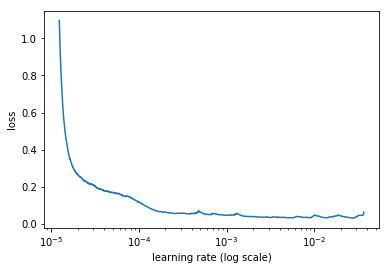

 59%|█████▉    | 3909/6597 [00:50<00:34, 78.11it/s, loss=0.181] 

In [128]:
learn.sched.plot(100)

### Train

In [129]:
learn = model.get_learner(embedded_size, len(df.columns) - len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)

In [130]:
lr = 1e-3

In [131]:
learn.fit(lr, 3, metrics=[exp_rmspe])

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

  1%|▏         | 85/6597 [00:03<04:03, 26.74it/s, loss=0.461]

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   exp_rmspe                       
    0      0.013472   5e-05      0.007052  
    1      0.011303   0.005827   0.073494                        
    2      0.009757   3e-06      0.001759                         



[3.0992996e-06, 0.0017589440187069994]

In [132]:
learn.fit(lr, 5, metrics=[exp_rmspe], cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                        
    0      0.007694   0.000192   0.013752  
    1      0.007593   0.000485   0.021784                         
    2      0.007275   0.000539   0.022958                         
    3      0.007137   1.6e-05    0.004006                         
    4      0.00701    0.000251   0.015975                         



[0.0002511944, 0.01597532090740772]

In [133]:
learn.fit(lr, 2, metrics=[exp_rmspe], cycle_len=4)

HBox(children=(IntProgress(value=0, description='Epoch', max=8), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                        
    0      0.007839   0.0        0.000398  
    1      0.007123   0.000918   0.030765                         
    2      0.006099   0.0        0.000174                         
    3      0.005584   4.7e-05    0.006833                         
    4      0.007492   0.0012     0.035249                         
    5      0.006841   0.001977   0.04349                          
    6      0.00655    0.000259   0.015956                         
    7      0.005598   0.000125   0.011131                         



[0.00012528941, 0.011130917956788286]

In [134]:
learn = model.get_learner(embedded_size, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [135]:
learn.fit(lr, 1, metrics=[exp_rmspe])

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                       
    0      0.013474   0.000342   0.018326  



[0.00034208572, 0.018325619057396884]

In [136]:
learn.fit(lr, 3, metrics=[exp_rmspe])

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                       
    0      0.011225   0.003126   0.057502  
    1      0.010342   0.001207   0.034142                         
    2      0.011005   0.000166   0.012972                         



[0.00016612397, 0.012972340086886615]

In [137]:
learn.fit(lr, 3, metrics=[exp_rmspe], cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                        
    0      0.007282   4.6e-05    0.0068    
    1      0.008174   4e-06      0.002085                         
    2      0.007116   6.4e-05    0.00797                          



[6.40365e-05, 0.007970403947095965]

In [138]:
learn = model.get_learner(embedded_size, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [139]:
learn.fit(lr, 3, metrics=[exp_rmspe])

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                       
    0      0.01502    9.1e-05    0.009494  
    1      0.011778   0.00065    0.025168                        
    2      0.009697   0.000456   0.02113                          



[0.00045610362, 0.021130151874235892]

In [140]:
learn.fit(lr, 3, metrics=[exp_rmspe], cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                        
    0      0.007056   6e-06      0.00237   
    1      0.007152   0.0        6e-05                            
    2      0.006623   0.00049    0.022377                         



[0.00048973743, 0.022376691605863606]

In [141]:
learn.save(f'{project_name}_weights')

## Predict

In [142]:
learn.load(f'{project_name}_weights')

In [143]:
x, y = learn.predict_with_targs()

In [144]:
exp_rmspe(x,y)

0.022376691605863606

#### Get and set predications for the test set

In [145]:
pred_test = learn.predict(is_test=True)

In [146]:
pred_test

array([[ 8.41413],
       [ 8.78155],
       [ 9.20665],
       [ 8.8336 ],
       [ 8.93074],
       [ 8.65885],
       [ 8.83161],
       [ 8.99133],
       [ 8.51501],
       [ 8.69918],
       [ 8.90821],
       [ 9.03679],
       [ 8.85084],
       [ 9.04675],
       [ 8.80453],
       [ 8.51208],
       [ 8.65939],
       [ 9.22809],
       [ 9.2451 ],
       [ 9.13118],
       ...,
       [ 9.06083],
       [ 9.55735],
       [ 8.73192],
       [ 8.82284],
       [ 9.04811],
       [ 9.13061],
       [ 8.18711],
       [ 9.20903],
       [ 8.90723],
       [ 8.6065 ],
       [ 8.68874],
       [ 8.58258],
       [ 8.3632 ],
       [ 8.63232],
       [ 8.32424],
       [ 8.11624],
       [ 8.94522],
       [ 8.8884 ],
       [10.04552],
       [ 8.82976]], dtype=float32)

In [147]:
pred_test = np.exp(pred_test)

In [148]:
pred_test

array([[ 4510.364 ],
       [ 6512.9546],
       [ 9963.181 ],
       [ 6860.9224],
       [ 7560.8394],
       [ 5760.915 ],
       [ 6847.3066],
       [ 8033.1196],
       [ 4989.081 ],
       [ 5997.967 ],
       [ 7392.4155],
       [ 8406.707 ],
       [ 6980.254 ],
       [ 8490.866 ],
       [ 6664.379 ],
       [ 4974.4766],
       [ 5764.0034],
       [10179.055 ],
       [10353.758 ],
       [ 9238.872 ],
       ...,
       [ 8611.279 ],
       [14148.319 ],
       [ 6197.5938],
       [ 6787.5054],
       [ 8502.429 ],
       [ 9233.613 ],
       [ 3594.3125],
       [ 9986.868 ],
       [ 7385.157 ],
       [ 5467.094 ],
       [ 5935.675 ],
       [ 5337.8623],
       [ 4286.4106],
       [ 5610.0596],
       [ 4122.5938],
       [ 3348.4087],
       [ 7671.136 ],
       [ 7247.4146],
       [23052.19  ],
       [ 6834.624 ]], dtype=float32)

In [149]:
joined_test['Sales'] = pred_test

#### Create kaggle submission file

In [150]:
submission_fname = f'{project_name}_submission.csv'

In [151]:
joined_test[['Id', 'Sales']].to_csv(submission_fname, index=False)

In [153]:
FileLink(submission_fname)

/home/paperspace/fastai/courses/dl1/Rossman_stores_submission.csv

### RandomForest - the ML way

In [154]:
from sklearn.ensemble import RandomForestRegressor

In [155]:
((val,trn), (y_val,y_trn)) = split_by_idx(val_idx, df.values, yl)

In [156]:
m = RandomForestRegressor(n_estimators=40, max_features=0.99, min_samples_leaf=2,
                          n_jobs=-1, oob_score=True)
m.fit(trn, y_trn);

In [157]:
preds = m.predict(val)
m.score(trn, y_trn), m.score(val, y_val), m.oob_score_, exp_rmspe(preds, y_val)

(0.9811976603138173, 0.0, 0.9207911189693401, 0.08735195582092872)